# Maximum Likelihood Estimation

We consider the following linear regression problem, where $\Phi$ defines the features, and $\epsilon$ is a Gaussian $\mathcal{N}(0,\Sigma)$:

\begin{align*}
y = \Phi^T(x)\theta + \epsilon
\end{align*}

With $\theta$ the parameters of the model, the Bayes theorem parameters can be expressed:

\begin{align*}
p(\theta|y) = \frac{p(y|\theta)p(\theta)}{p(y)}
\end{align*}

The likelihood is $p(y|\theta)$ and easily be expressed starting from the distribution of the random variable $\epsilon$.

\begin{align*}
p(\epsilon) = \frac{1}{(2 \pi)^\frac{N}{2} |\Sigma|^\frac{1}{2}}\exp \left(-\frac{1}{2}\epsilon^T \Sigma^{-1} \epsilon \right)
\end{align*}

If the assumption of independence between the $\epsilon_i$ holds, $\Sigma$ can be written as $\Sigma = \sigma^2 I$. This leads to:

\begin{align*}
p(y|\theta)= \frac{1}{(2 \pi)^\frac{N}{2} (\sigma^{2N})^\frac{1}{2}}\exp \left(-\frac{1}{2 \sigma^2}(y - \Phi\theta)^T(y - \Phi\theta) \right)
\end{align*}

Fitting the model means optimizing the parameter $\theta$ such that the probability of having the data is maximized. This maximization problem is similar to minimize the opposite. Taking the log does not change the minimizer we are looking for.

\begin{align*}
\mathrm{argmax}_{\theta} p(y|\theta) &= \mathrm{argmin}_{\theta} -\log p(y|\theta)\\
&= \mathrm{argmin}_{\theta} \frac{N}{2}\log(2\pi) + N\log(\sigma)+\frac{1}{2 \sigma^2}(y - \Phi\theta)^T(y - \Phi\theta)\\
&=\mathrm{argmin}_{\theta} \frac{1}{2 \sigma^2}(y - \Phi\theta)^T(y - \Phi\theta)
\end{align*}

The function we try to minimize can be written as:

\begin{align*}
\mathcal{L}(y, \Phi, \sigma, \theta) = \frac{1}{2 \sigma^2}(y - \Phi\theta)^T(y - \Phi\theta)
\end{align*}

In taking the partial derivative with respect to $\theta$ and solving the equation:

\begin{align*}
&\frac{\partial \mathcal{L}}{\partial \theta} = 0\\
\Leftrightarrow &\Phi^T (y - \Phi \theta)=0\\
\Leftrightarrow &\Phi^T y = \Phi^T \Phi \theta\\
\end{align*}

The optimizer is $\theta^* = (\Phi^T \Phi)^{-1}\Phi^T y$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 25
X = np.reshape(np.linspace(0, 1, N), (N, 1))
Y = np.cos(10*X**2) + 0.1 * np.sin(100*X)

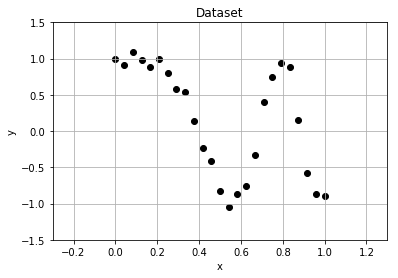

In [7]:
plt.scatter(X,Y,color="black")
plt.axis((-.3,1.3,-1.5,1.5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset")
plt.grid()

In [8]:
def phi(n, x, kernel):
    if kernel==1: #poly
        D=np.array([x**i for i in range(n+1)]).flatten()
    elif kernel==2: #trigo
        D=np.array([np.cos(2*np.pi*i/2*x) if i%2==0 else np.sin(2*np.pi*(i+1)/2*x) for i in range(2*n+1)]).flatten()
    elif kernel==3: #gauss
        D=np.array([])
        D=np.append(D, 1)
        value=np.linspace(0,1,n)
        D=np.append(D, [np.exp(-(x-mean)**2/(2*0.1**2)) for mean in value]).flatten()
    return D

def phi_mat(n, X, kernel):
    size=n+1
    if kernel==2:
        size=2*n+1    
    return np.array([phi(n,x, kernel) for x in X ]).reshape(len(X),size)

def teta(n, X, Y, kernel):
    return np.dot(np.dot(np.linalg.inv(np.dot(phi_mat(n, X, kernel).T, phi_mat(n, X, kernel))), phi_mat(n, X, kernel).T), Y)
   
def y_out(n, x_test, X, Y, kernel):
    return np.dot(phi_mat(n, x_test, kernel), teta(n, X, Y, kernel)) 

# Kernels
For each kernel, a vector $\phi$ is defined, corresponding to the basis of order $K$.
$$
\begin{align*}
\phi(x) = \begin{bmatrix}
           \phi_0(x) \\
           \phi_1(x) \\
           \vdots \\
           \phi_K(x) \\
         \end{bmatrix}
\end{align*}
$$

Note that the matrix $\Phi$ associated to $\phi$ is (applied to the set of N examples):
$$
\begin{align*}	
\Phi(x) =\begin{bmatrix}
           \phi^T(x_1) \\
           \phi^T(x_2) \\
           \vdots \\
           \phi^T(x_{N}) \\
         \end{bmatrix}
\end{align*}
$$

## Polynomial
For the polynomial basis functions, with $K$ defined as the order of the basis:
$$
\begin{align*}	
    \phi(x) &= \begin{bmatrix}
           \phi_0(x) \\
           \phi_1(x) \\
           \vdots \\
           \phi_K(x) \\
         \end{bmatrix}=
         \begin{bmatrix}
           1 \\
           x \\
           \vdots \\
           x^K \\
         \end{bmatrix}
\end{align*}
$$

The size of the base is $K+1$.

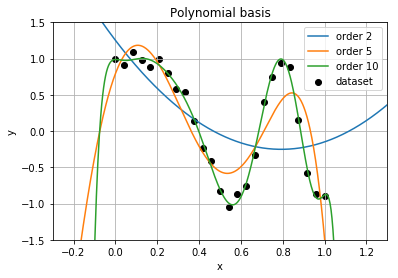

In [9]:
plt.scatter(X,Y,color="black", label="dataset")
plt.axis((-.3,1.3,-1.5,1.5))
plt.plot(x_test,y_out(2, x_test, X, Y, 1), label="order 2")
plt.plot(x_test,y_out(5, x_test, X, Y, 1), label="order 5")
plt.plot(x_test,y_out(10, x_test, X, Y, 1), label="order 10")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial basis")
plt.grid()
plt.legend()

## Trigonometric
For the trigonometric basis functions, with $K$ defined as the order of the basis:
$$
\begin{align*}	
    \phi(x) &= \begin{bmatrix}
           \phi_0(x) \\
           \phi_1(x) \\
           \phi_2(x) \\
           \phi_3(x) \\
           \vdots \\
           \phi_{2K}(x) \\
         \end{bmatrix}=
         \begin{bmatrix}
           1 \\
           \sin(2 \pi x) \\
           \cos(2 \pi x) \\
           \sin(4 \pi x) \\
           \vdots \\
           \cos(2K \pi x) \\
         \end{bmatrix}
\end{align*}
$$

Note that for a given order $K$, the size of the basis is $2K+1$.

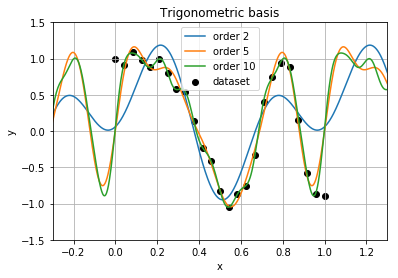

In [10]:
plt.scatter(X,Y, color="black", label="dataset")
plt.axis((-0.3,1.3,-1.5,1.5))
plt.plot(x_test,y_out(2, x_test, X, Y, 2), label="order 2")
plt.plot(x_test,y_out(5, x_test, X, Y, 2), label="order 5")
plt.plot(x_test,y_out(10, x_test, X, Y, 2), label="order 10")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trigonometric basis")
plt.grid()
plt.legend()

## Gaussian
For the gaussian basis functions, with $K$ defined as the order of the basis, $l$ the length parameter, and $\mu_i$ the centers:
$$
\begin{align*}	
    \phi(x) &= \begin{bmatrix}
           \phi_0(x) \\
           \phi_1(x) \\
           \vdots \\
           \phi_K(x) \\
         \end{bmatrix}=
         \begin{bmatrix}
           1 \\
           \exp\left(\frac{-(x-\mu_1)^2}{2l^2}\right) \\
           \vdots \\
           \exp\left(\frac{-(x-\mu_K)^2}{2l^2}\right) \\
         \end{bmatrix}
\end{align*}
$$

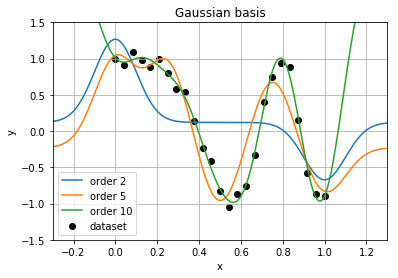

In [11]:
plt.scatter(X,Y, color="black", label="dataset")
plt.axis((-0.3,1.3,-1.5,1.5))
plt.plot(x_test,y_out(2, x_test, X, Y, 3), label="order 2")
plt.plot(x_test,y_out(5, x_test, X, Y, 3), label="order 5")
plt.plot(x_test,y_out(10, x_test, X, Y, 3), label="order 10")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gaussian basis")
plt.grid()
plt.legend()

# Maximum A Posteriori 
Let us assume that the Gaussian prior is:

\begin{align*}
	p(\theta) = \mathcal{N}(0, b^2)
\end{align*}

Starting from the Bayes’ theorem, the posterior is:

\begin{align*}
	p(\theta|y)=\frac{p(y|\theta)p(\theta)}{p(y)}
\end{align*}

Then, by appling the negative log:

\begin{align*}
	-\log p(\theta|y)=-\log p(y|\theta)-\log p(\theta)+\log p(y)
\end{align*}

And by taking the $\mathrm{argmin}_{\theta}$:

\begin{align*}
	\mathrm{argmin}_{\theta} -\log p(\theta|y)=\mathrm{argmin}_{\theta}-\log p(y|\theta)-\log p(\theta)+\log p(y)
\end{align*}

Since $\log p(y)$ does not depend on $\theta$, the previous equation can be simplified: 

\begin{align*}
	\mathrm{argmin}_{\theta} -\log p(\theta| y)=\operatorname*{arg\,min}_\theta-\log p(y|x, \theta)-\log p(\theta)
\end{align*}

Taking the expression found for the MLE:

\begin{align*}
	\mathrm{argmin}_{\theta} -\log p(\theta| y)=\mathrm{argmin}_{\theta} \frac{1}{2\sigma^2}(y-\Phi\theta)^T(y-\Phi\theta)+\frac{1}{2b^2}\theta^T\theta
\end{align*}

The function we try to minimize is now:

\begin{align*}
\mathcal{L}(y, \Phi, \sigma, \theta) = \frac{1}{2 \sigma^2}(y - \Phi\theta)^T(y - \Phi\theta) +\frac{1}{2b^2}\theta^T\theta
\end{align*}

The additionnal term $\frac{1}{2b^2}\theta^T\theta$ is a term of regularization, preventing from overfitting.

In taking the partial derivative with respect to $\theta$ and solving the equation:

\begin{align*}
&\frac{\partial \mathcal{L}}{\partial \theta} = 0\\
\Leftrightarrow &-\frac{\Phi^T (y - \Phi \theta)}{\sigma^2} + \frac{\theta}{b^2}=0\\
\Leftrightarrow &\Phi^T y = \left(\Phi^T \Phi + \frac{\sigma^2}{b^2}\right)\theta\\
\end{align*}


The optimizer is $\theta^* = \left(\Phi^T \Phi + \frac{\sigma^2}{b^2}\right)^{-1}\Phi^T y$

By developing this vectorised equation, we find the expression of the linear regression with regularized least square loss function:

\begin{align*}
    \sum_{i=1}^{N}(y_n -\theta^T\phi(x_i))^2+\frac{\sigma^2}{b^2}\sum_{j=1}^{M}\theta_j^2
\end{align*}

From this equation, it is easy to identify $\lambda$:

\begin{align*}
	\lambda=\frac{\sigma^2}{b^2}
\end{align*}

There are two terms in the loss function. The first one describes how the model is fitting well the data. For example, a very high order basis will produce a curve that will pass through every point so the difference will be zero. On the other hand, a very high order basis will have a huge norm for its parameter $\theta$. By penalizing the norm of $\theta$, the loss function is preventing this behaviour which eventually leads to over-fitting.

In [34]:
def teta_regu(lamb, n, X, Y, kernel):
    return np.dot(np.dot(np.linalg.inv(np.dot(phi_mat(n, X, kernel).T, phi_mat(n, X, kernel))+lamb*np.eye(n+1)), phi_mat(n, X, kernel).T), Y)

def y_out_regu(lamb, n, x_test, X, Y, kernel):
    return np.dot(phi_mat(n, x_test, kernel), teta_regu(lamb, n, X, Y, kernel))    

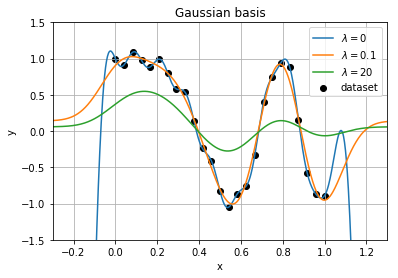

In [35]:
plt.scatter(X,Y, color="black", label="dataset")
plt.axis((-0.3,1.3,-1.5,1.5))
plt.plot(x_test,y_out_regu(0, 20, x_test, X, Y, 3), label="$\lambda=0$")
plt.plot(x_test,y_out_regu(0.1, 20, x_test, X, Y, 3), label="$\lambda=0.1$")
plt.plot(x_test,y_out_regu(20, 20, x_test, X, Y, 3), label="$\lambda=20$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gaussian basis")
plt.grid()
plt.legend()

# Comparison
In this section, we compare the results from MLE and MAP on the toy dataset defined before. In the followig, the trigonometric basis is chosen.

A good criteria, is to evaluate both the train error and the test error. For this particular example, a leave-one-out cross validation is implemented.

In [32]:
def CV_unique(n, X, Y, kernel): #leave-one-out CV
    y_result=np.array([])
    for i in range(len(X)):
        X_red=np.array([])
        Y_red=np.array([])
        for j in range(len(X)):
            if j!=i:
                X_red=np.append(X_red, X[j])
                Y_red=np.append(Y_red, Y[j])
        y_result=np.append(y_result, y_out(n, X[i], X_red, Y_red, kernel))
    return y_result
    
def compute_mean(A, B):
    somme=0
    for i in range(len(A)):
        somme+=(A[i]-B[i])**2
    somme/=len(A)
    return somme

def boucle_sigma_square(a, b, X, Y, kernel):
    sigma=np.array([])
    for i in range(a, b+1):
        sigma=np.append(sigma, compute_mean(y_out(i, X, X, Y, kernel), Y))
    return sigma

def boucle_CV(a, b, X, Y, kernel):
    all_mean=np.array([])
    for i in range(a, b+1):
        all_mean=np.append(all_mean, compute_mean(CV_unique(i, X, Y, kernel), Y))
    return all_mean

x_test = np.linspace(-1,1.3,1000)

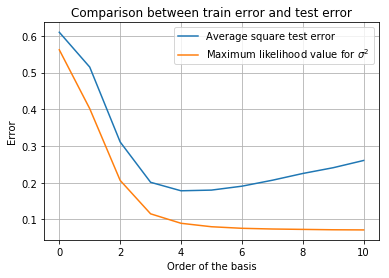

In [36]:
d = 10
plt.plot(np.arange(0,d+1,1), boucle_CV(0, d, X, Y, 2), label="Average square test error")
plt.plot(np.arange(0,d+1,1), boucle_sigma_square(0, d, X, Y, 2), label="Maximum likelihood value for $\sigma^2$")
plt.xlabel("Order of the basis")
plt.ylabel("Error")
plt.title("Comparison between train error and test error")
plt.grid()
plt.legend()